In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
sns.set(rc={'figure.figsize':(16,9)})
ros = RandomOverSampler(random_state=52)
smote = SMOTENC(random_state=52,categorical_features=[3,5,7,8,9,10])
mnx = MinMaxScaler()

In [2]:
df1 = pd.read_csv('Part2 - Data1.csv')

In [3]:
df2 = pd.read_csv('Part2 -Data2.csv')

In [4]:
df = pd.merge(df1,df2,on='ID')

In [5]:
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [6]:
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [9]:
len(df)

4980

In [10]:
df['ID'].nunique()

4980

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 583.6 KB


In [18]:
df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,2.395582,1.939536,1.880924,56.589759,0.104418,0.060643,0.597189,0.294378,0.096386
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.147200,1.750006,0.840144,101.836758,0.305832,0.238697,0.490513,0.455808,0.295149
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,3.000000,2.525000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
for i in ['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']:
    df[i] = df[i].astype('category')

In [12]:
df['CustomerSince'] = np.where(df['CustomerSince']<0,0,df['CustomerSince'])

In [20]:
df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,2510.345382,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,10.000000,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,1265.750000,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,2510.500000,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,3755.250000,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,5000.000000,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


<Axes: xlabel='Age'>

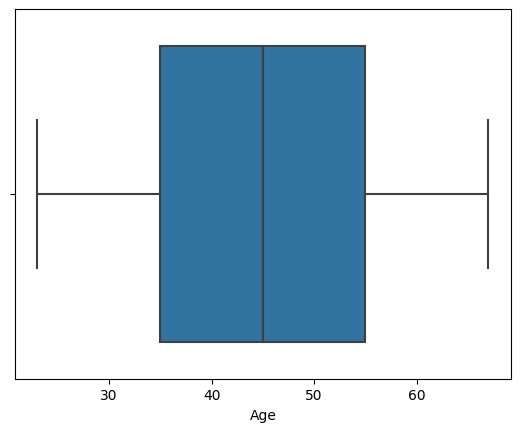

In [25]:
sns.boxplot(x=df['Age'])

- Most people are between 35 and 55 years old

<Axes: xlabel='CustomerSince', ylabel='Count'>

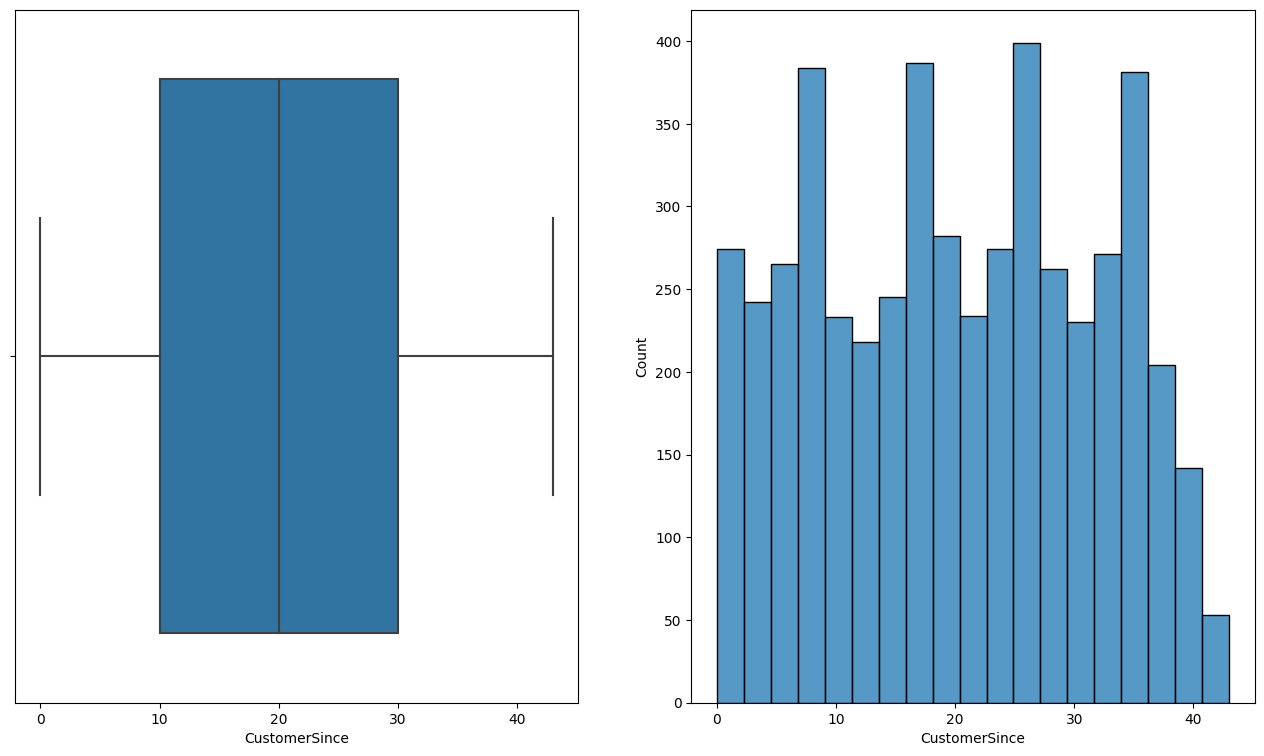

In [36]:
_,pos = plt.subplots(1,2,figsize=(16,9))
sns.boxplot(x=df['CustomerSince'],ax=pos[0])
sns.histplot(x=df['CustomerSince'],ax=pos[1])

- Most of the customers have been with us since 10-30. (units have been masked)

<Axes: xlabel='HighestSpend', ylabel='Count'>

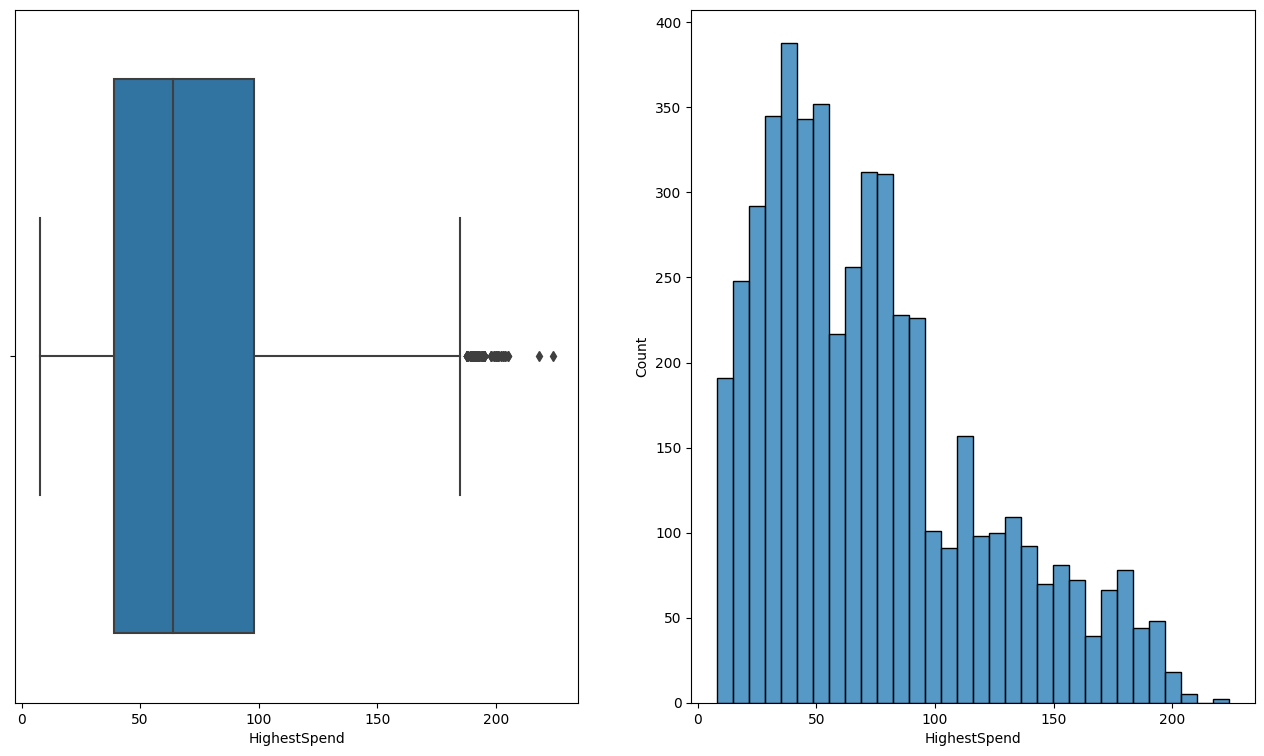

In [38]:
_,pos = plt.subplots(1,2,figsize=(16,9))
sns.boxplot(x=df['HighestSpend'],ax=pos[0])
sns.histplot(x=df['HighestSpend'],ax=pos[1])

In [39]:
df['HighestSpend'].mean()

73.85240963855422

- The average highest spend amount in a single transaction is ~74
- Few customers have spent more than 200
- Mostly the highest amount spend in a single transaction ranges between 45 - 100</br>
(units have been masked)

<Axes: ylabel='HiddenScore'>

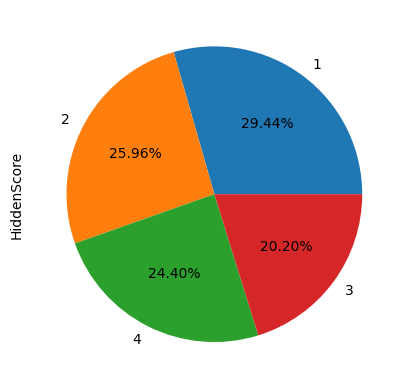

In [53]:
df['HiddenScore'].value_counts().plot.pie(autopct='%1.2f%%')

- Nearly even distribution of each category

<Axes: xlabel='MonthlyAverageSpend', ylabel='Count'>

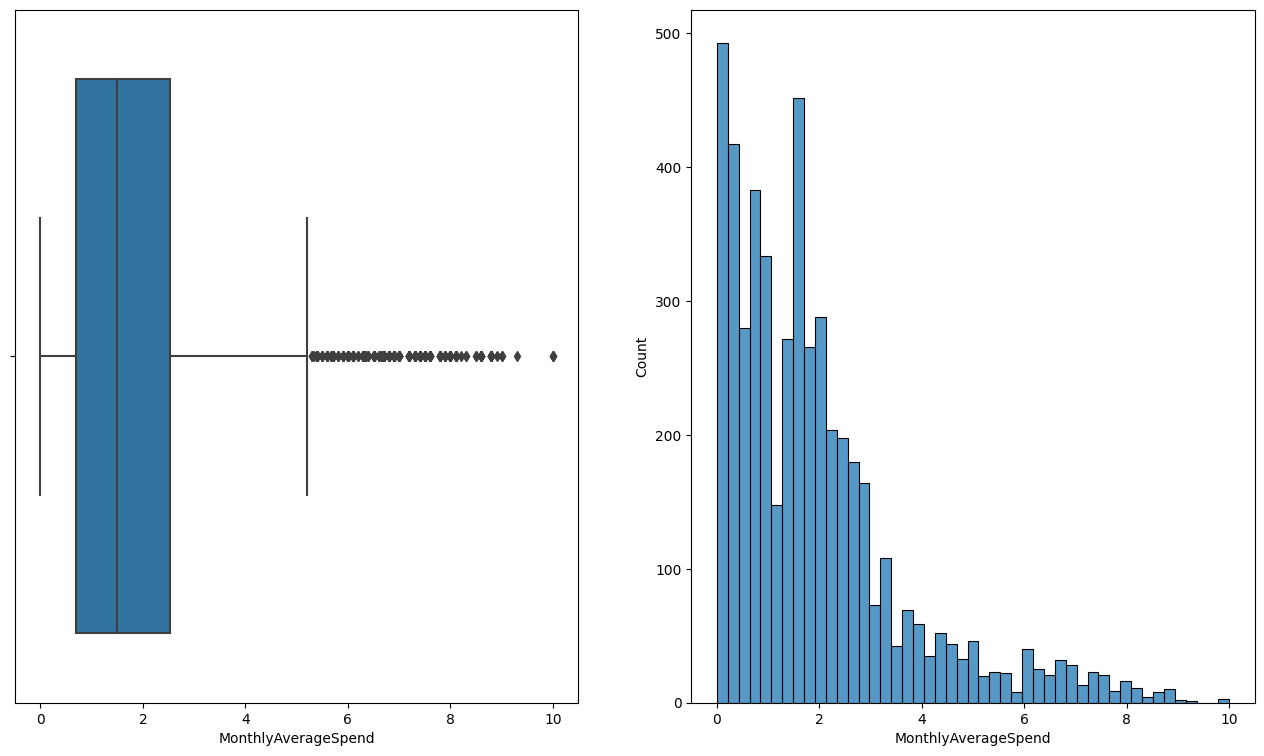

In [41]:
_,pos = plt.subplots(1,2,figsize=(16,9))
sns.boxplot(x=df['MonthlyAverageSpend'],ax=pos[0])
sns.histplot(x=df['MonthlyAverageSpend'],ax=pos[1])

- There's a huge positive skewness here
- Mostly the average amount spent monthly ranges between 1-3
- There are a lot of outliers, showing that there are some customers that spend huge amounts on a monthly level

<Axes: ylabel='Level'>

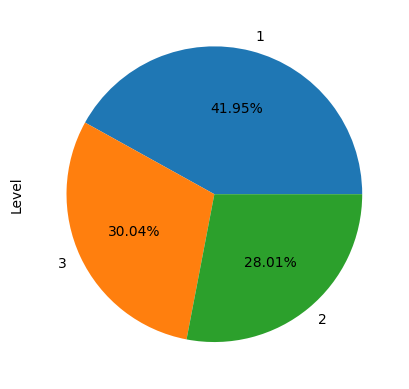

In [54]:
df['Level'].value_counts().plot.pie(autopct='%1.2f%%')

- Level 1 has the most number of customers
- Level 2 and 3 have around the same number of customers

<Axes: xlabel='Mortgage', ylabel='Count'>

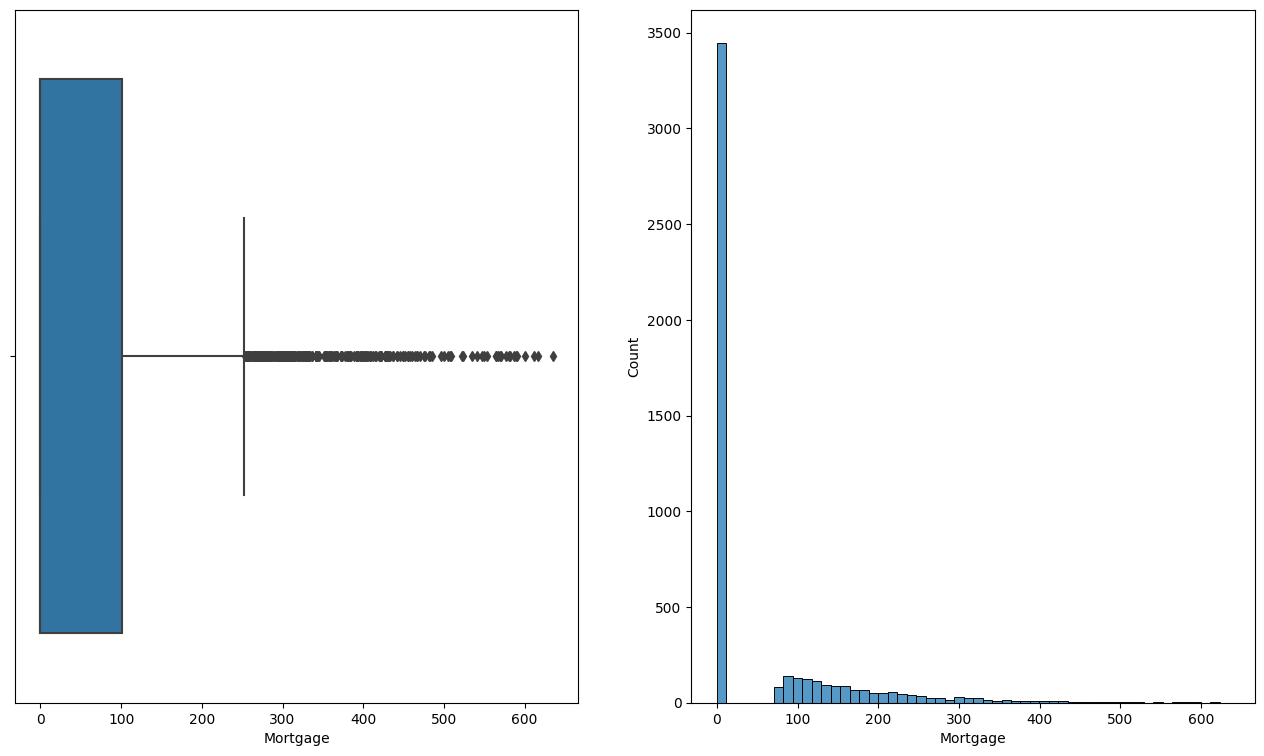

In [42]:
_,pos = plt.subplots(1,2,figsize=(16,9))
sns.boxplot(x=df['Mortgage'],ax=pos[0])
sns.histplot(x=df['Mortgage'],ax=pos[1])

- Most of the customers don't have mortgage

<Axes: ylabel='Security'>

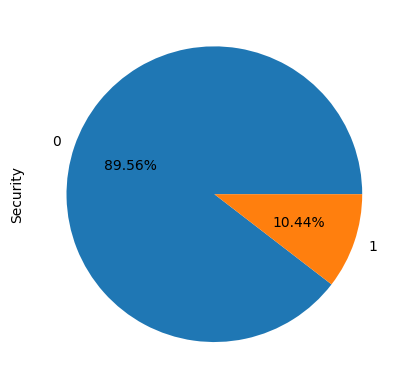

In [56]:
df['Security'].value_counts().plot.pie(autopct='%1.2f%%')

- Around 10% of customers have a security asset

<Axes: ylabel='FixedDepositAccount'>

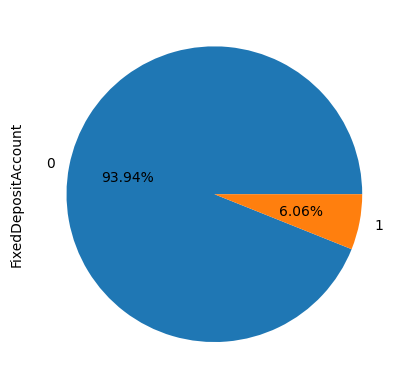

In [57]:
df['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.2f%%')

- ~6% of our customers have a fixed deposit account

<Axes: ylabel='InternetBanking'>

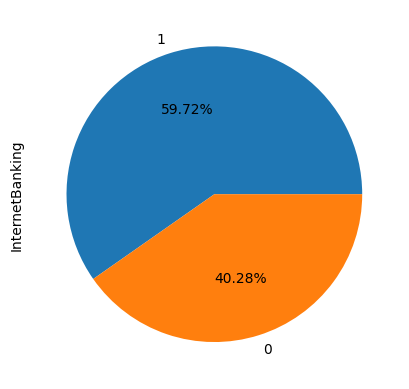

In [58]:
df['InternetBanking'].value_counts().plot.pie(autopct='%1.2f%%')

- ~60% of our customers use Internet Banking

<Axes: ylabel='CreditCard'>

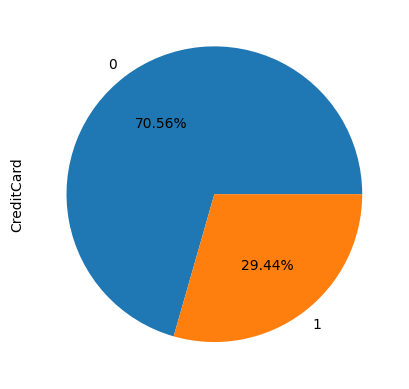

In [59]:
df['CreditCard'].value_counts().plot.pie(autopct='%1.2f%%')

- Around 30% of our customers have a credit card with us

<Axes: ylabel='LoanOnCard'>

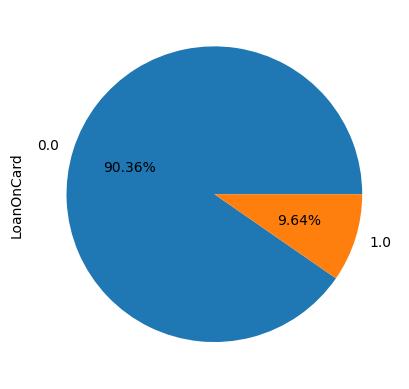

In [60]:
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.2f%%')

- 90% of the customers don't have loan on their credit card

<Axes: xlabel='LoanOnCard', ylabel='Age'>

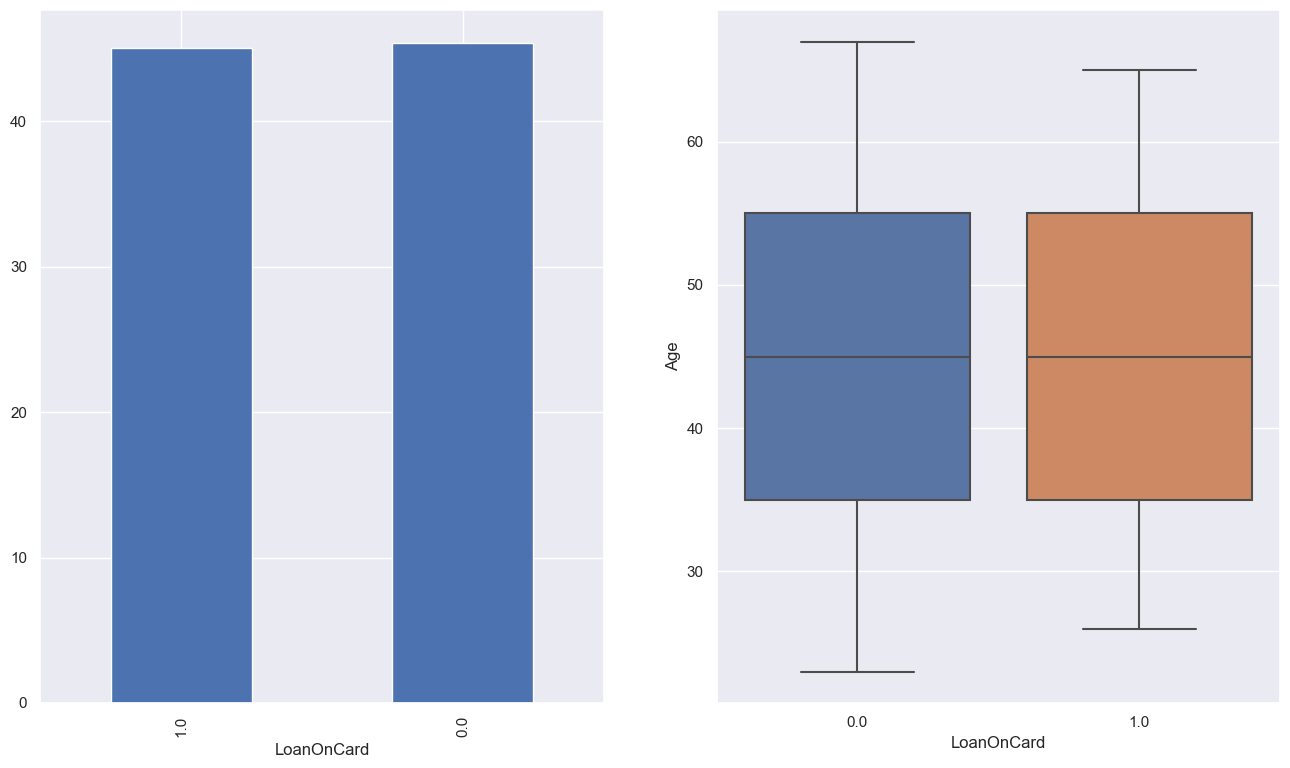

In [70]:
_,pos = plt.subplots(1,2,figsize=(16,9))
df.groupby('LoanOnCard')['Age'].mean().sort_values().plot(x='LoanOnCard',kind='bar',ax=pos[0])
sns.boxplot(x='LoanOnCard',y='Age',data=df,ax=pos[1])

- Age distribution is nearly the same for customers with or without a loan on their card

<Axes: xlabel='Age'>

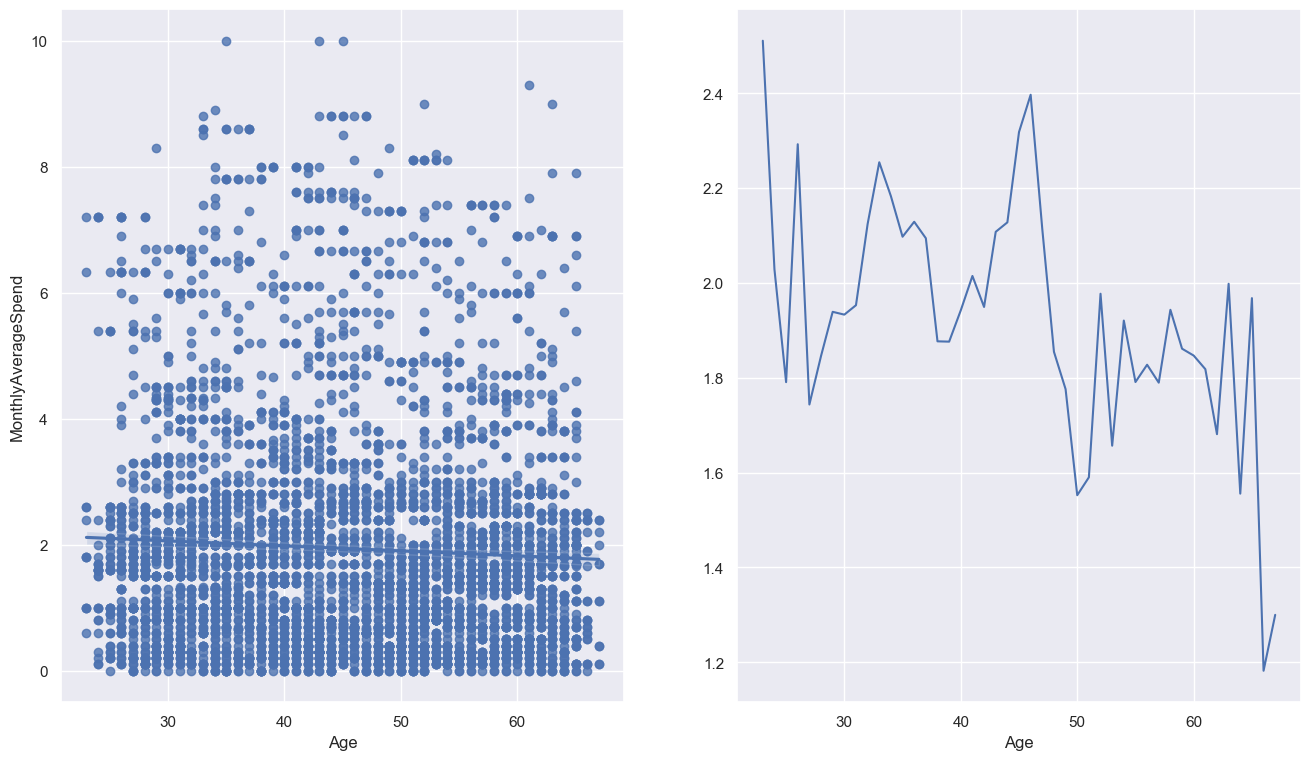

In [75]:
_,pos = plt.subplots(1,2,figsize=(16,9))
sns.regplot(x='Age',y='MonthlyAverageSpend',data=df,ax=pos[0])
df.groupby('Age')['MonthlyAverageSpend'].mean().plot(x='Age',ax=pos[1])

- Average Monthly Spend is higher amongst the customers between the age 26-45

<Axes: xlabel='LoanOnCard', ylabel='HighestSpend'>

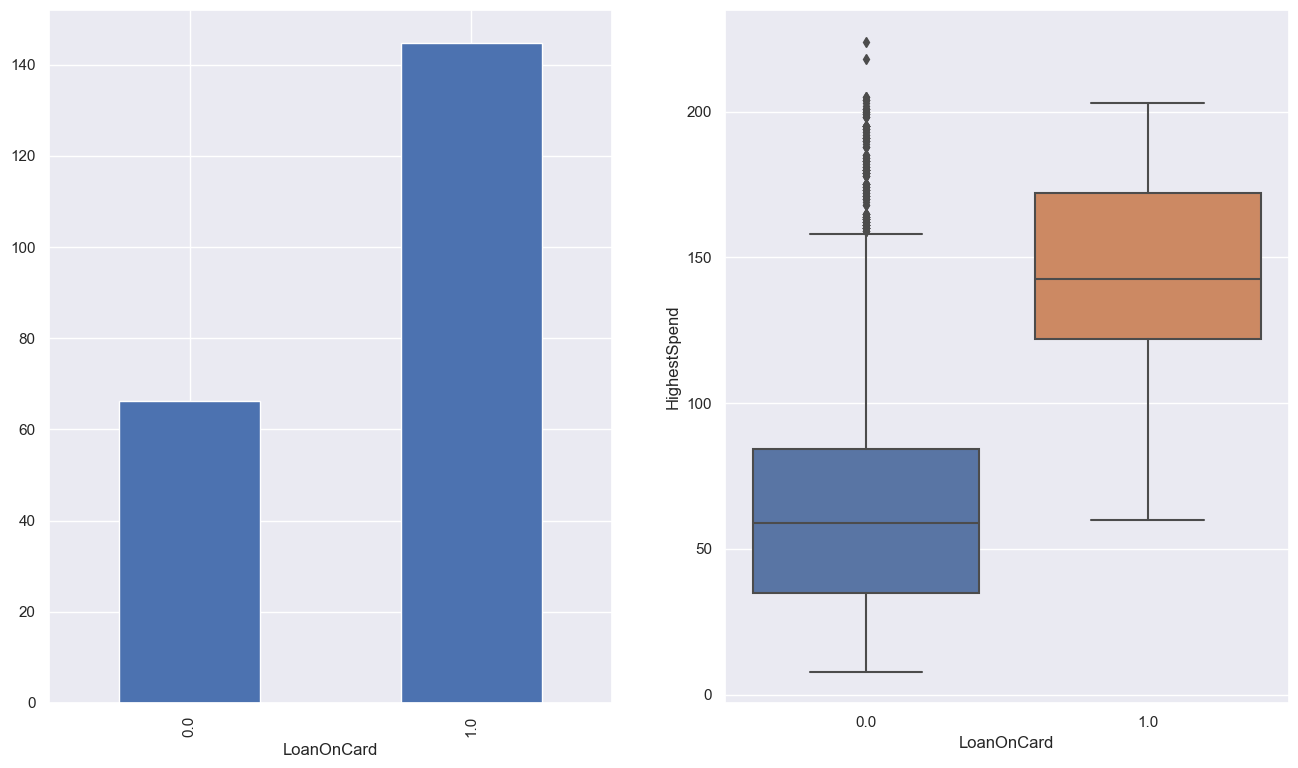

In [67]:
_,pos = plt.subplots(1,2,figsize=(16,9))
df.groupby('LoanOnCard')['HighestSpend'].mean().sort_values().plot(x='LoanOnCard',kind='bar',ax=pos[0])
sns.boxplot(x='LoanOnCard',y='HighestSpend',data=df,ax=pos[1])

- People having loan on their card generally spend more per transaction

<Axes: xlabel='LoanOnCard', ylabel='MonthlyAverageSpend'>

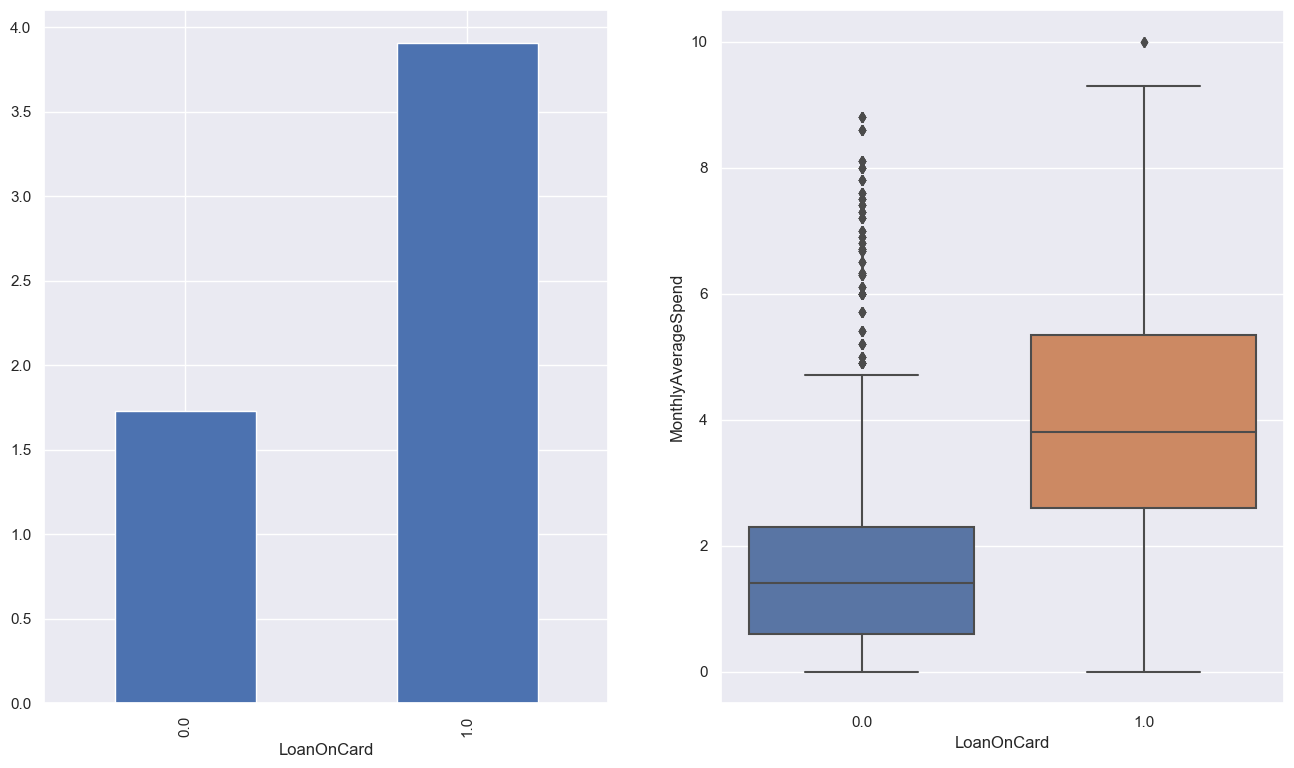

In [68]:
_,pos = plt.subplots(1,2,figsize=(16,9))
df.groupby('LoanOnCard')['MonthlyAverageSpend'].mean().sort_values().plot(x='LoanOnCard',kind='bar',ax=pos[0])
sns.boxplot(x='LoanOnCard',y='MonthlyAverageSpend',data=df,ax=pos[1])

- The monthly average amount spent is generally more for customers who have a loan on their card

<Axes: xlabel='LoanOnCard', ylabel='Mortgage'>

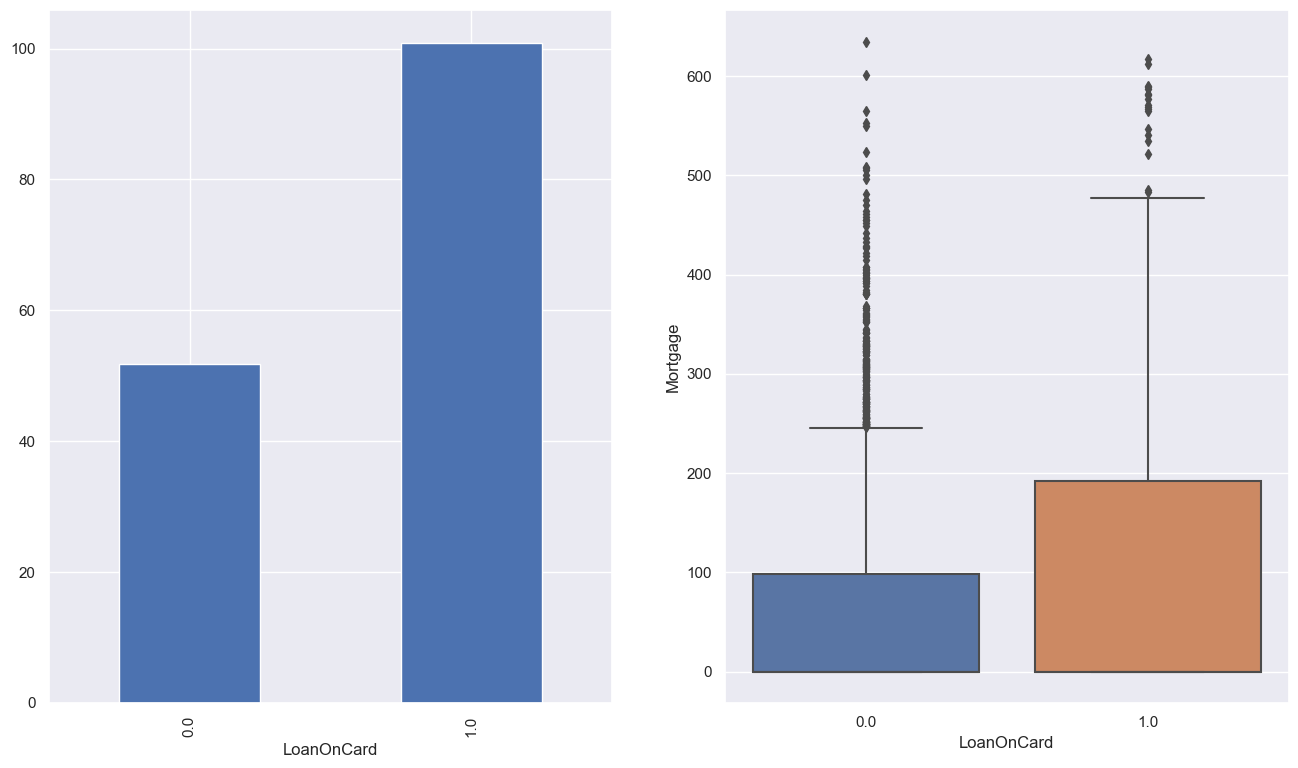

In [69]:
_,pos = plt.subplots(1,2,figsize=(16,9))
df.groupby('LoanOnCard')['Mortgage'].mean().sort_values().plot(x='LoanOnCard',kind='bar',ax=pos[0])
sns.boxplot(x='LoanOnCard',y='Mortgage',data=df,ax=pos[1])

- Average mortage value is higher for customers who have a loan on their card
- Both cases has extreme values for mortgage, but generally customers with loan on their card have a higher mortgage value

<Axes: xlabel='Level', ylabel='MonthlyAverageSpend'>

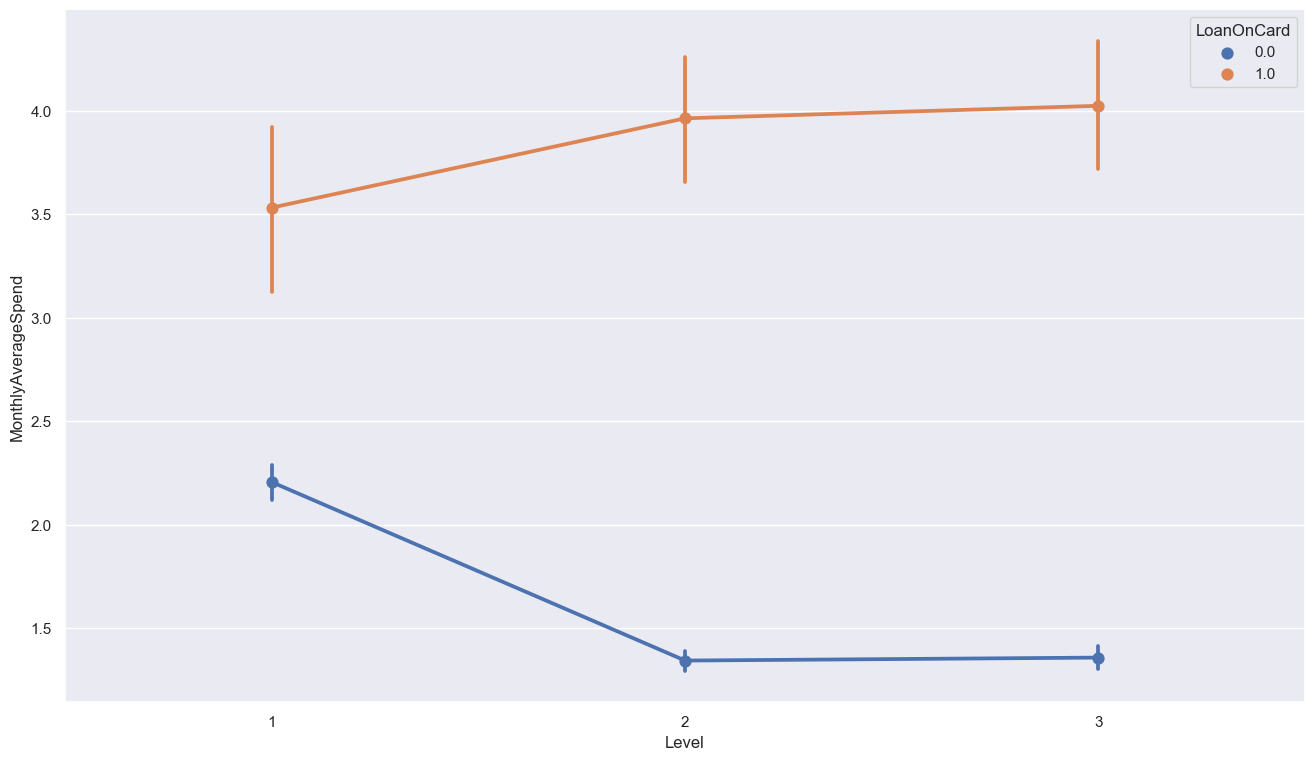

In [80]:
sns.pointplot(x='Level',y='MonthlyAverageSpend',hue='LoanOnCard',data=df)

- Customers with Loan on their card spend more money, spend being more in Levels 2 and 3.

<Axes: xlabel='CreditCard', ylabel='MonthlyAverageSpend'>

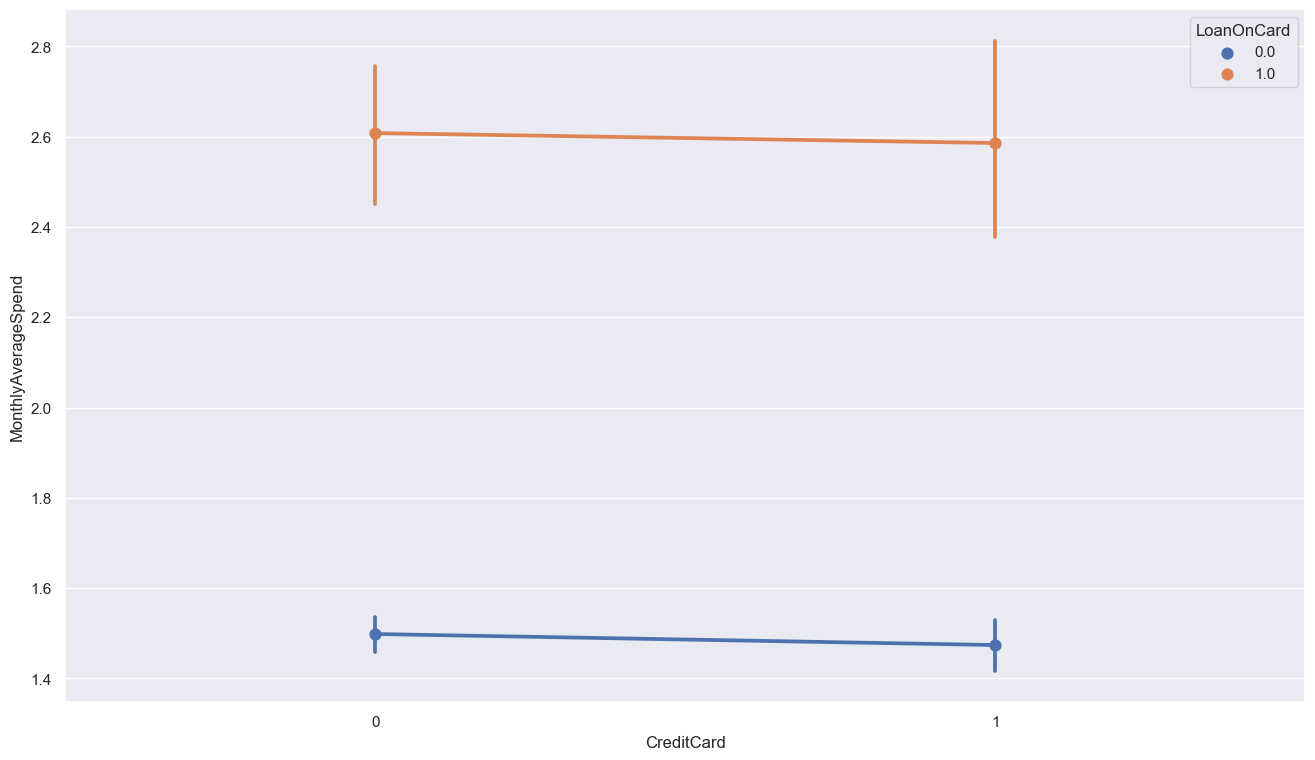

In [157]:
sns.pointplot(x='CreditCard',y='MonthlyAverageSpend',hue='LoanOnCard',data=df)

- Customers with Credit cards spend more

<Axes: xlabel='FixedDepositAccount'>

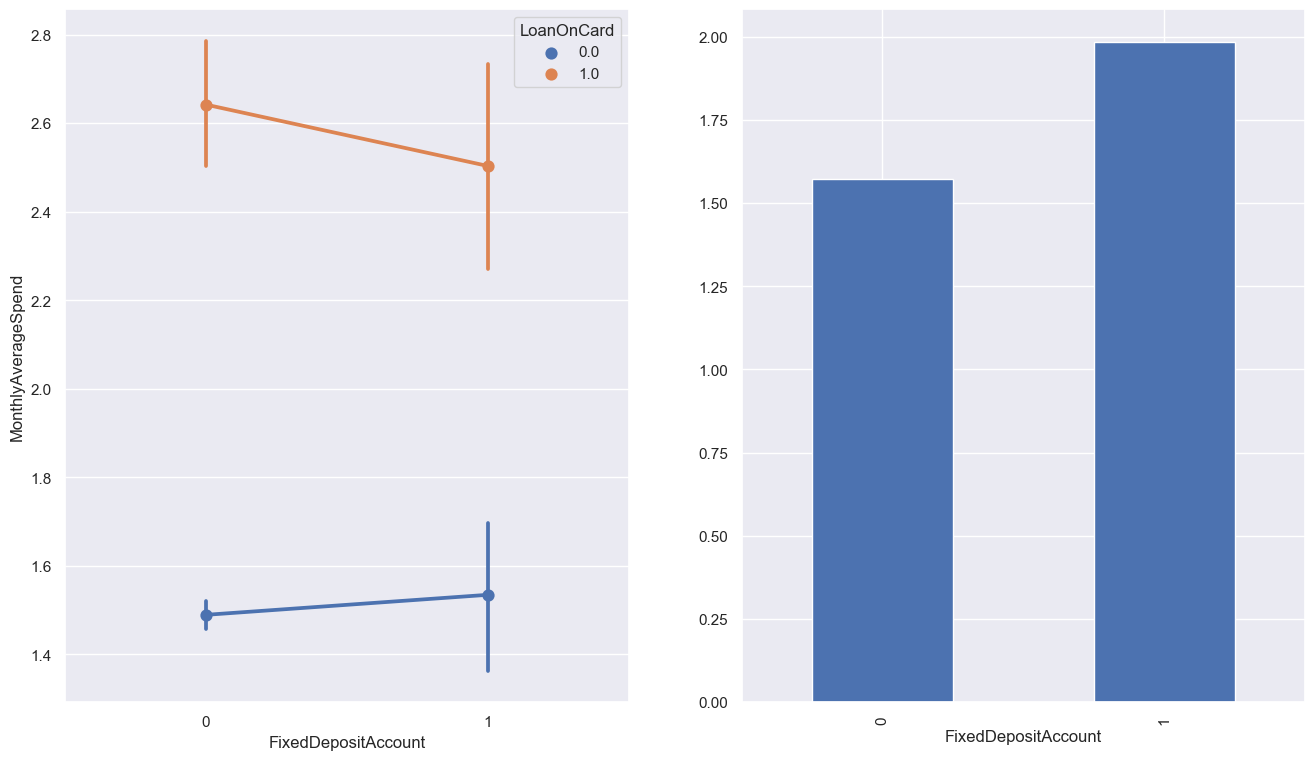

In [159]:
_,pos = plt.subplots(1,2,figsize=(16,9))
sns.pointplot(x='FixedDepositAccount',y='MonthlyAverageSpend',hue='LoanOnCard',data=df,ax=pos[0])
df.groupby('FixedDepositAccount')['MonthlyAverageSpend'].mean().plot(kind='bar')

- Customers with a fixed deposit on an average have a higher monthly average spend

In [43]:
df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [13]:
for i in ['HighestSpend','MonthlyAverageSpend','Mortgage']:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3-q1
    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5
    mn = df.loc[(df[i]>=lower) & (df[i]<=upper),i].mean()
    df[i] = np.where(df[i]<lower,mn,df[i])
    df[i] = np.where(df[i]>upper,mn,df[i])

<Axes: ylabel='LoanOnCard'>

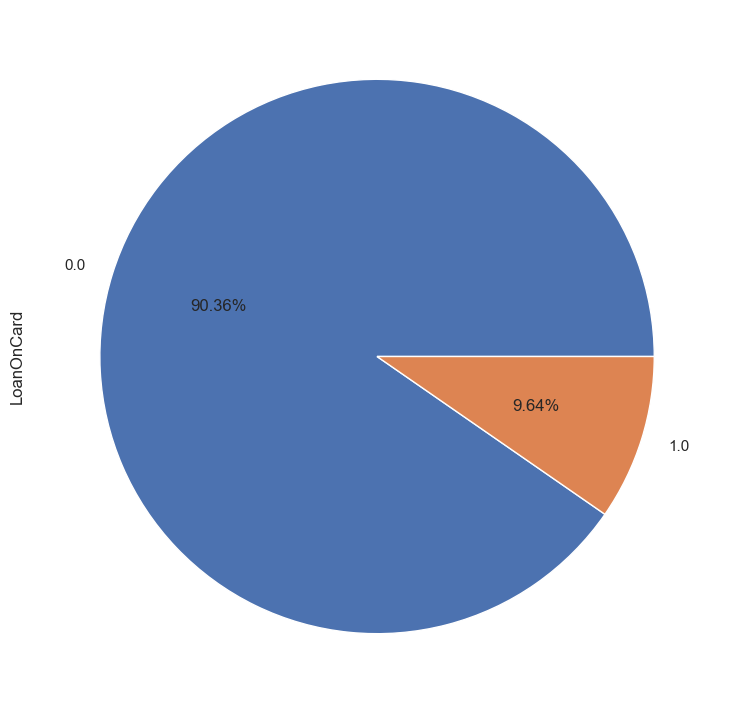

In [84]:
df['LoanOnCard'].value_counts().plot.pie(autopct='%1.2f%%')

- There is heavy imbalance in the target variable

In [112]:
x = df.drop(columns=['ID','LoanOnCard','ZipCode'])
y = df.LoanOnCard

##### Random over Sampling

In [113]:
x_ros, y_ros = ros.fit_resample(x,y)

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.3,random_state=52)

In [115]:
model_log_ros = LogisticRegression(max_iter=2000)
model_log_ros.fit(x_train,y_train)

pred_log_ros = model_log_ros.predict(x_test)

auc_log_ros = roc_auc_score(y_test,pred_log_ros)

fpr_log_ros,tpr_log_ros,_ = roc_curve(y_test,pred_log_ros)

print(classification_report(y_test,pred_log_ros))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1341
         1.0       0.88      0.90      0.89      1359

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



In [116]:
model_gnb_ros = GaussianNB()
model_gnb_ros.fit(x_train,y_train)

pred_gnb_ros = model_gnb_ros.predict(x_test)

auc_gnb_ros = roc_auc_score(y_test,pred_gnb_ros)

fpr_gnb_ros, tpr_gnb_ros, _ = roc_curve(y_test,pred_gnb_ros)

print(classification_report(y_test,pred_gnb_ros))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1341
         1.0       0.87      0.82      0.85      1359

    accuracy                           0.85      2700
   macro avg       0.85      0.85      0.85      2700
weighted avg       0.85      0.85      0.85      2700



In [117]:
model_cnb_ros = CategoricalNB()
model_cnb_ros.fit(x_train,y_train)

pred_cnb_ros = model_cnb_ros.predict(x_test)

auc_cnb_ros = roc_auc_score(y_test,pred_cnb_ros)

fpr_cnb_ros, tpr_cnb_ros, _ = roc_curve(y_test,pred_cnb_ros)

print(classification_report(y_test,pred_cnb_ros))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      1341
         1.0       0.87      0.96      0.91      1359

    accuracy                           0.91      2700
   macro avg       0.91      0.91      0.91      2700
weighted avg       0.91      0.91      0.91      2700



##### SMOTE

In [118]:
x_sm,y_sm = smote.fit_resample(x,y)

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=52)

In [120]:
model_log_sm = LogisticRegression(max_iter=2000)
model_log_sm.fit(x_train,y_train)

pred_log_sm = model_log_sm.predict(x_test)

auc_log_sm = roc_auc_score(y_test,pred_log_sm)

fpr_log_sm, tpr_log_sm, _ = roc_curve(y_test,pred_log_sm)

print(classification_report(y_test,pred_log_sm))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      1341
         1.0       0.89      0.88      0.89      1359

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



In [121]:
model_gnb_sm = GaussianNB()
model_gnb_sm.fit(x_train,y_train)

pred_gnb_sm = model_gnb_sm.predict(x_test)

auc_gnb_sm = roc_auc_score(y_test,pred_gnb_sm)

fpr_gnb_sm, tpr_gnb_sm, _ = roc_curve(y_test,pred_gnb_sm)

print(classification_report(y_test,pred_gnb_sm))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1341
         1.0       0.89      0.89      0.89      1359

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



In [122]:
model_cnb_sm = CategoricalNB()
model_cnb_sm.fit(x_train,y_train)

pred_cnb_sm = model_cnb_sm.predict(x_test)

auc_cnb_sm = roc_auc_score(y_test,pred_cnb_sm)

fpr_cnb_sm, tpr_cnb_sm, _ = roc_curve(y_test,pred_cnb_sm)

print(classification_report(y_test,pred_cnb_sm))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91      1341
         1.0       0.88      0.94      0.91      1359

    accuracy                           0.91      2700
   macro avg       0.91      0.91      0.91      2700
weighted avg       0.91      0.91      0.91      2700



----

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=52)

In [124]:
model_log = LogisticRegression(max_iter=2000)
model_log.fit(x_train,y_train)

pred_log = model_log.predict(x_test)

auc_log = roc_auc_score(y_test,pred_log)

fpr_log, tpr_log, _ = roc_curve(y_test,pred_log)

print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1373
         1.0       0.81      0.64      0.71       121

    accuracy                           0.96      1494
   macro avg       0.89      0.81      0.85      1494
weighted avg       0.96      0.96      0.96      1494



In [125]:
model_gnb = GaussianNB()
model_gnb.fit(x_train,y_train)

pred_gnb = model_gnb.predict(x_test)

auc_gnb = roc_auc_score(y_test,pred_gnb)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test,pred_gnb)

print(classification_report(y_test,pred_gnb))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1373
         1.0       0.51      0.50      0.50       121

    accuracy                           0.92      1494
   macro avg       0.73      0.73      0.73      1494
weighted avg       0.92      0.92      0.92      1494



In [126]:
model_cnb = CategoricalNB()
model_cnb.fit(x_train,y_train)

pred_cnb = model_cnb.predict(x_test)

auc_cnb = roc_auc_score(y_test,pred_cnb)

fpr_cnb, tpr_cnb, _ = roc_curve(y_test,pred_cnb)

print(classification_report(y_test,pred_cnb))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1373
         1.0       0.78      0.45      0.57       121

    accuracy                           0.95      1494
   macro avg       0.87      0.72      0.77      1494
weighted avg       0.94      0.95      0.94      1494



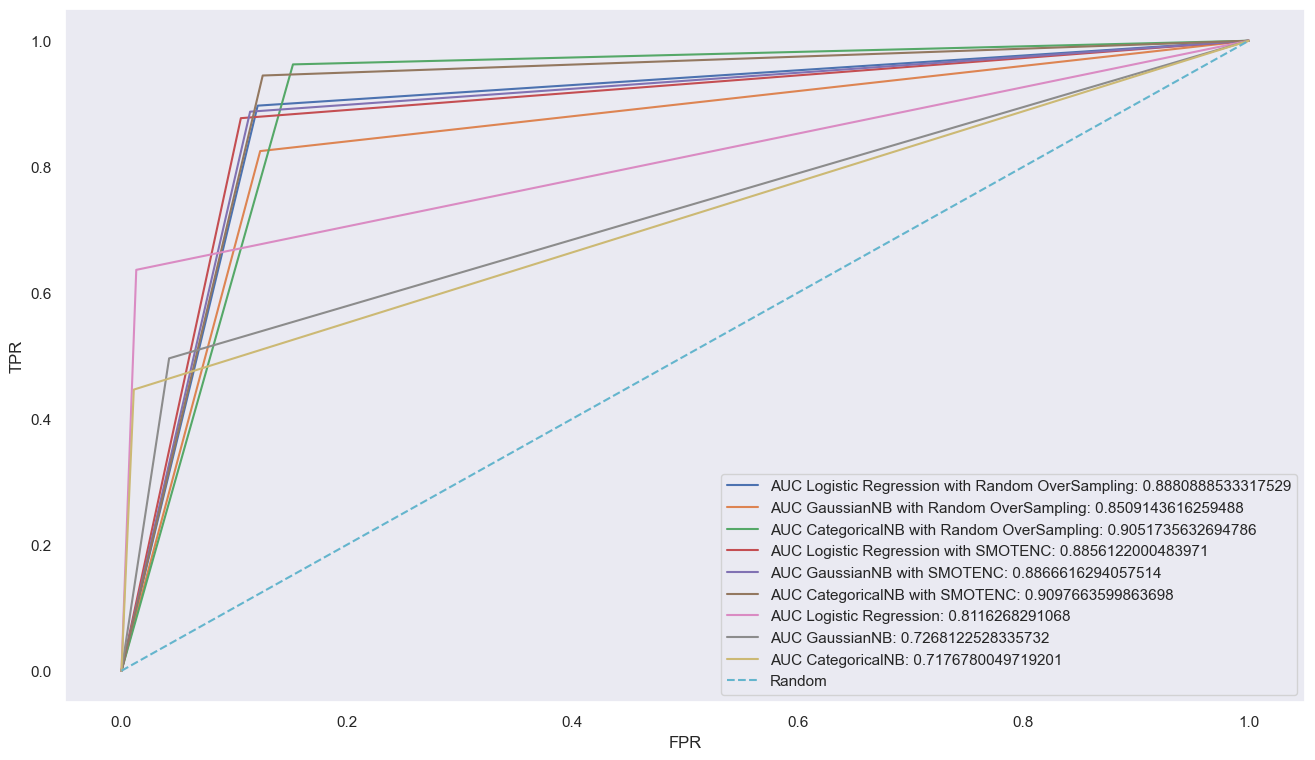

In [127]:
plt.figure(figsize=(16,9))
plt.plot(fpr_log_ros,tpr_log_ros,label='AUC Logistic Regression with Random OverSampling: {}'.format(auc_log_ros))
plt.plot(fpr_gnb_ros,tpr_gnb_ros,label='AUC GaussianNB with Random OverSampling: {}'.format(auc_gnb_ros))
plt.plot(fpr_cnb_ros,tpr_cnb_ros,label='AUC CategoricalNB with Random OverSampling: {}'.format(auc_cnb_ros))
plt.plot(fpr_log_sm,tpr_log_sm,label='AUC Logistic Regression with SMOTENC: {}'.format(auc_log_sm))
plt.plot(fpr_gnb_sm,tpr_gnb_sm,label='AUC GaussianNB with SMOTENC: {}'.format(auc_gnb_sm))
plt.plot(fpr_cnb_sm,tpr_cnb_sm,label='AUC CategoricalNB with SMOTENC: {}'.format(auc_cnb_sm))
plt.plot(fpr_log,tpr_log,label='AUC Logistic Regression: {}'.format(auc_log))
plt.plot(fpr_gnb,tpr_gnb,label='AUC GaussianNB: {}'.format(auc_gnb))
plt.plot(fpr_cnb,tpr_cnb,label='AUC CategoricalNB: {}'.format(auc_cnb))
plt.plot([0,1],[0,1],label='Random',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()

- Finalizing the CategoricalNB model with SMOTENC as its overall Precision and F1 score is better
- To counter the imbalance in class distribution of target variable we tried two methods Random OverSampling and SMOTE. Of which we finalised SMOTE (SMOTENC as we had categorical variables in our features) as it gave us a better result.

----

###### Conclusion and Improvisations

- The CustomerSince feature had negative values.
- There are some IDs where the customers don't have a credit card but have loan on their cards, eg: ID=[10,17,19],etc.
